# Install normtools()

In [2]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("normtools", quietly = TRUE)) {
  remotes::install_github("agronomy4future/normtools")
}
library(remotes)
library(normtools)

# Upload the dataset for practice

In [16]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/biomass_N_P.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))
head(df,5)

,season,cultivar,treatment,rep,biomass,nitrogen,phosphorus
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,cv1,N0,1,9.16,1.23,0.41
2,2022,cv1,N0,2,13.06,1.49,0.45
3,2022,cv1,N0,3,8.40,1.18,0.31
4,2022,cv1,N0,4,11.97,1.42,0.48
5,2022,cv1,N1,1,24.90,1.77,0.49


# Basic code

In [ ]:
# Using method=1 for Z-test normalization
z_test= normtools(df, c("Env1", "Env2",""), c("y1","y1",""),
                  method= 1) # 1 or "z_test"

# Using method=2 for Robust Scaling
robust_scaling= normtools(df, c("Env1", "Env2",""), c("y1","y1",""),
                          method= "2") # 2 or "robust_scaling"

# Using method=3 for Min-Max Scaling
min_max_scaling= normtools(df, c("Env1", "Env2",""), c("y1","y1",""),
                           method= 3) # 3 or "min_max_saling"

# Using method=4 for Log Transformation
log_transformation= normtools(df, c("Env1", "Env2",""), c("y1","y1",""),
                              method= 4) # 4 or "log_transformation"

# 1) Z-test normalization

In [9]:
z_test= normtools(df, c("season", "cultivar"), c("biomass","nitrogen","phosphorus"),
                  method= 1) # 1 or "z_test"

In [23]:
head(z_test,5)

season,cultivar,treatment,rep,biomass,nitrogen,phosphorus,Normalized_biomass,mean_biomass,sd_biomass,Normalized_nitrogen,mean_nitrogen,sd_nitrogen,Normalized_phosphorus,mean_phosphorus,sd_phosphorus
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,cv1,N0,1,9.16,1.23,0.41,-1.6187589,32.047,14.13861,-1.9459123,1.875,0.3314641,0.0388260,0.4075,0.06438985
2022,cv1,N0,2,13.06,1.49,0.45,-1.3429185,32.047,14.13861,-1.1615136,1.875,0.3314641,0.6600419,0.4075,0.06438985
2022,cv1,N0,3,8.40,1.18,0.31,-1.6725124,32.047,14.13861,-2.0967583,1.875,0.3314641,-1.5142138,0.4075,0.06438985
2022,cv1,N0,4,11.97,1.42,0.48,-1.4200123,32.047,14.13861,-1.3726979,1.875,0.3314641,1.1259539,0.4075,0.06438985
2022,cv1,N1,1,24.90,1.77,0.49,-0.5054952,32.047,14.13861,-0.3167764,1.875,0.3314641,1.2812579,0.4075,0.06438985


### Data rotation

In [10]:
if(!require(readr)) install.packages("dplyr")
if(!require(readr)) install.packages("tidyr")
library(dplyr)
library(tidyr)

z_test_result= data.frame(z_test %>%
                                 pivot_longer(
                                 cols= c(Normalized_nitrogen, Normalized_phosphorus),
                                 names_to= "nutrient",
                                 values_to= "uptake")
)

### Graph for Z-test normalization

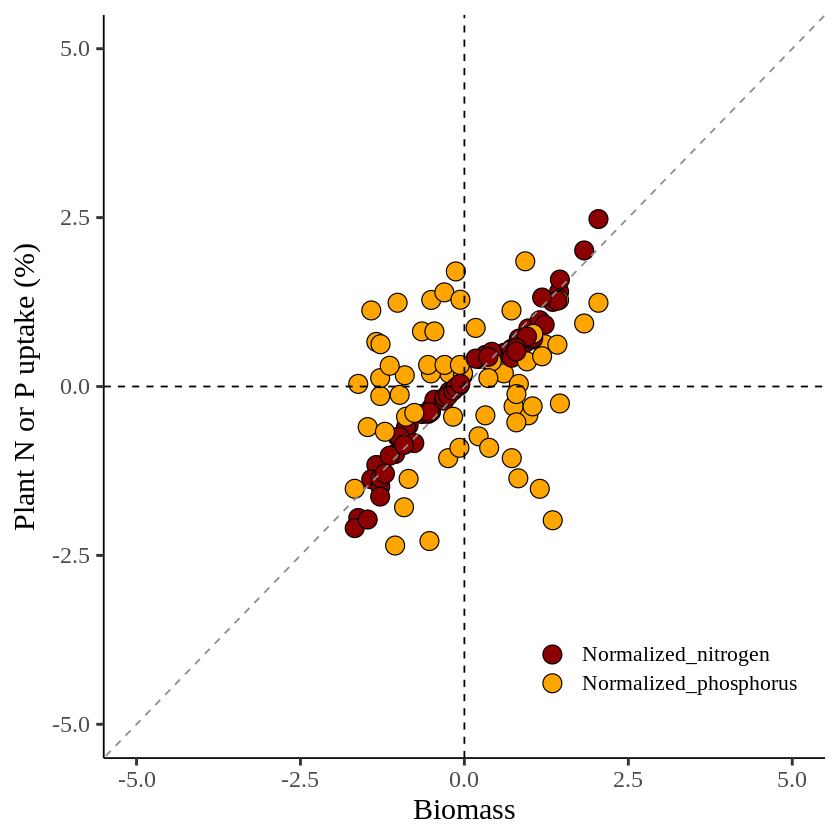

In [12]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)
ggplot(data=z_test_result, aes(x=Normalized_biomass, y=uptake)) +
  geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
             color="black", size=5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  geom_abline(slope=1, linetype= "dashed", color="grey55",
              linewidth=0.5) +
  labs(x="Biomass", y="Plant N or P uptake (%)") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position=c(0.78,0.12),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=13, color="black"),
        legend.background= element_rect(fill="white"),
        axis.line = element_line(linewidth = 0.5, colour="black"))

# 2) Robust Scaling

In [18]:
robust_scaling= normtools(df, c("season", "cultivar"), c("biomass","nitrogen","phosphorus"),
                          method= 2) # 2 or "robust_scaling"

In [24]:
head(robust_scaling,5)

season,cultivar,treatment,rep,biomass,nitrogen,phosphorus,Normalized_biomass,quantile_25_biomass,quantile_75_biomass,Normalized_nitrogen,quantile_25_nitrogen,quantile_75_nitrogen,Normalized_phosphorus,quantile_25_phosphorus,quantile_75_phosphorus
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,cv1,N0,1,9.16,1.23,0.41,-1.2548462,24.355,43.7,-2.1294964,1.7475,2.095,-0.1176471,0.375,0.46
2022,cv1,N0,2,13.06,1.49,0.45,-1.0532437,24.355,43.7,-1.3812950,1.7475,2.095,0.3529412,0.375,0.46
2022,cv1,N0,3,8.40,1.18,0.31,-1.2941329,24.355,43.7,-2.2733813,1.7475,2.095,-1.2941176,0.375,0.46
2022,cv1,N0,4,11.97,1.42,0.48,-1.1095890,24.355,43.7,-1.5827338,1.7475,2.095,0.7058824,0.375,0.46
2022,cv1,N1,1,24.90,1.77,0.49,-0.4411993,24.355,43.7,-0.5755396,1.7475,2.095,0.8235294,0.375,0.46


### Data rotation

In [20]:
if(!require(readr)) install.packages("dplyr")
if(!require(readr)) install.packages("tidyr")
library(dplyr)
library(tidyr)

robust_scaling_result= data.frame(robust_scaling %>%
                                         pivot_longer(
                                         cols= c(Normalized_nitrogen, Normalized_phosphorus),
                                         names_to= "nutrient",
                                         values_to= "uptake")
)

### Graph for Robust Scaling

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


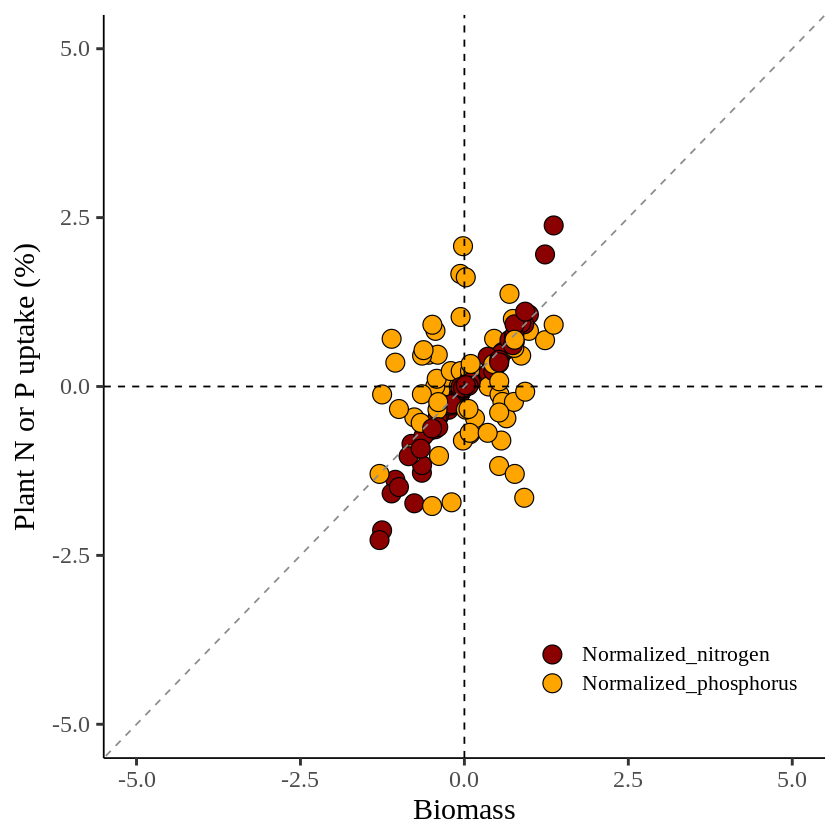

In [22]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)
ggplot(data=robust_scaling_result, aes(x=Normalized_biomass, y=uptake)) +
  geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
             color="black", size=5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  geom_abline(slope=1, linetype= "dashed", color="grey55",
              linewidth=0.5) +
  labs(x="Biomass", y="Plant N or P uptake (%)") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position=c(0.78,0.12),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=13, color="black"),
        legend.background= element_rect(fill="white"),
        axis.line = element_line(linewidth = 0.5, colour="black"))

# 3) Min-Max Scaling

In [25]:
min_max_scaling= normtools(df, c("season", "cultivar"), c("biomass","nitrogen","phosphorus"),
                           method= 3) # 3 or "min_max_saling"

In [26]:
head(min_max_scaling,5)

season,cultivar,treatment,rep,biomass,nitrogen,phosphorus,Normalized_biomass,min_biomass,max_biomass,Normalized_nitrogen,min_nitrogen,max_nitrogen,Normalized_phosphorus,min_phosphorus,max_phosphorus
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,cv1,N0,1,9.16,1.23,0.41,0.01724529,8.4,52.47,0.04310345,1.18,2.34,0.6190476,0.28,0.49
2022,cv1,N0,2,13.06,1.49,0.45,0.10574087,8.4,52.47,0.26724138,1.18,2.34,0.8095238,0.28,0.49
2022,cv1,N0,3,8.40,1.18,0.31,0.00000000,8.4,52.47,0.00000000,1.18,2.34,0.1428571,0.28,0.49
2022,cv1,N0,4,11.97,1.42,0.48,0.08100749,8.4,52.47,0.20689655,1.18,2.34,0.9523810,0.28,0.49
2022,cv1,N1,1,24.90,1.77,0.49,0.37440436,8.4,52.47,0.50862069,1.18,2.34,1.0000000,0.28,0.49


### Data rotation

In [27]:
if(!require(readr)) install.packages("dplyr")
if(!require(readr)) install.packages("tidyr")
library(dplyr)
library(tidyr)

min_max_scaling_result= data.frame(min_max_scaling %>%
                                           pivot_longer(
                                           cols= c(Normalized_nitrogen, Normalized_phosphorus),
                                           names_to= "nutrient",
                                           values_to= "uptake")
)

### Graph for Min-Max Scaling

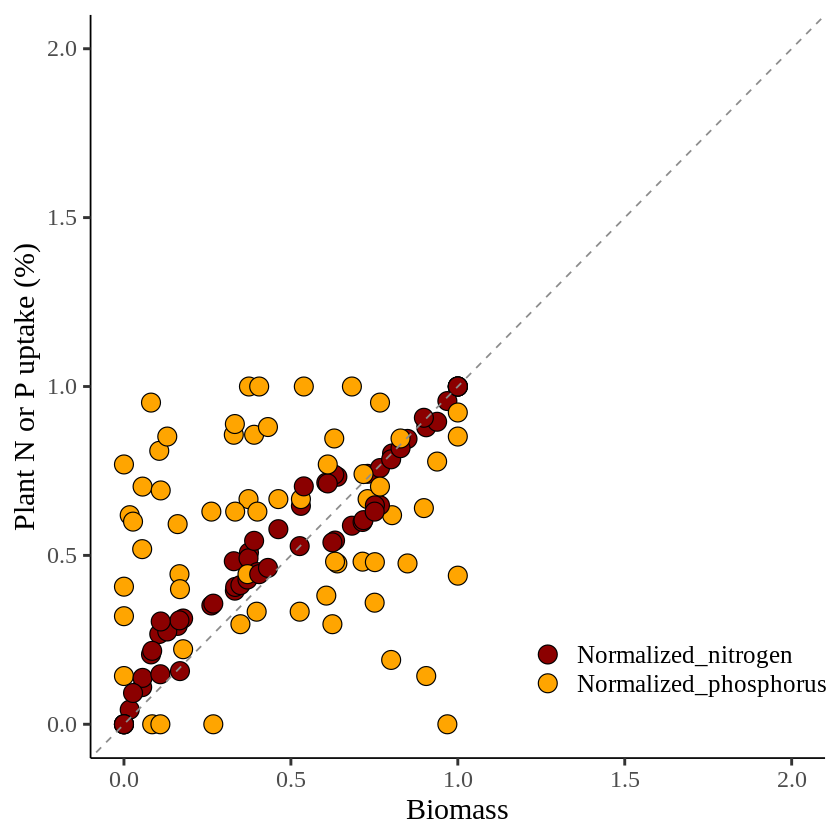

In [29]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)
ggplot(data=min_max_scaling_result, aes(x=Normalized_biomass, y=uptake))+
       geom_point(aes(fill=as.factor(nutrient),
       shape=as.factor(nutrient)), color="black", size=5) +
       scale_fill_manual(values=c("darkred","orange")) +
       scale_shape_manual(values=c(21,21)) +
       scale_x_continuous(breaks=seq(0,2,0.5), limits=c(0,2)) +
       scale_y_continuous(breaks=seq(0,2,0.5), limits=c(0,2)) +
       geom_abline(slope=1, linetype= "dashed", color="grey55",
                   linewidth=0.5) +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.80,0.12),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain",size=15,
                                      color="black"),
             legend.background=element_rect(fill="white"),
             axis.line=element_line(linewidth=0.5, colour="black"))

# 4) Log Transformation

In [30]:
log_transformation= normtools(df, c("season", "cultivar"), c("biomass","nitrogen","phosphorus"),
                              method= 4) # 4 or "log_transformation"

In [31]:
head(log_transformation,5)

season,cultivar,treatment,rep,biomass,nitrogen,phosphorus,Normalized_biomass,Normalized_nitrogen,Normalized_phosphorus
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,cv1,N0,1,9.16,1.23,0.41,1.0068937,0.3483049,0.1492191
2022,cv1,N0,2,13.06,1.49,0.45,1.1479853,0.3961993,0.1613680
2022,cv1,N0,3,8.40,1.18,0.31,0.9731279,0.3384565,0.1172713
2022,cv1,N0,4,11.97,1.42,0.48,1.1129400,0.3838154,0.1702617
2022,cv1,N1,1,24.90,1.77,0.49,1.4132998,0.4424798,0.1731863


### Data rotation

In [32]:
if(!require(readr)) install.packages("dplyr")
if(!require(readr)) install.packages("tidyr")
library(dplyr)
library(tidyr)

log_transformation_result= data.frame(log_transformation %>%
                                           pivot_longer(
                                           cols= c(Normalized_nitrogen, Normalized_phosphorus),
                                           names_to= "nutrient",
                                           values_to= "uptake")
)

### Graph for Log Transformation

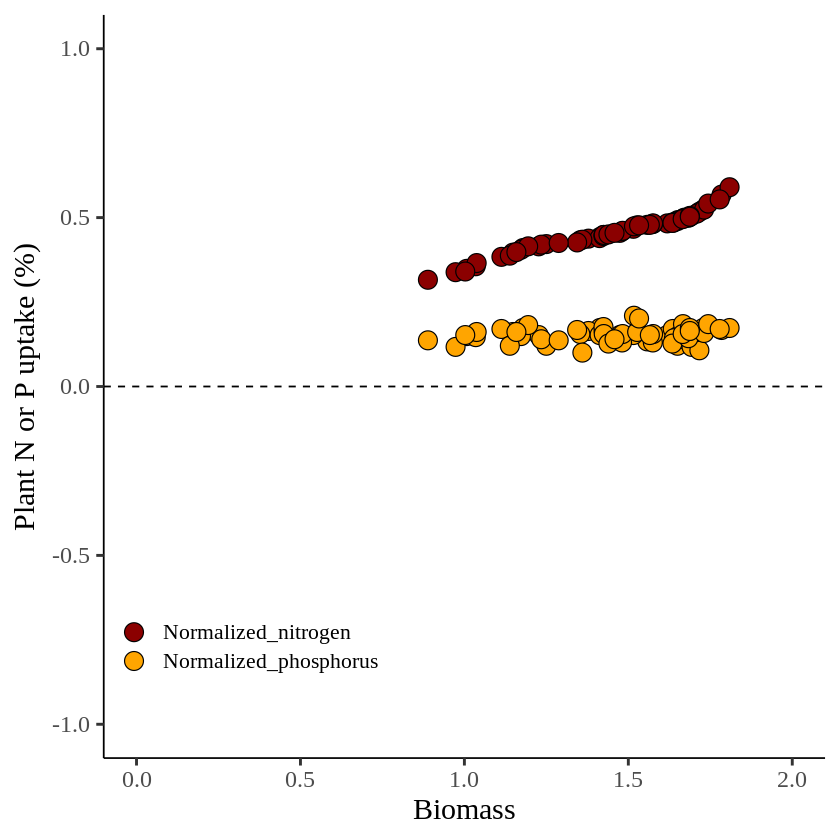

In [33]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)
ggplot(data=log_transformation_result, aes(x=Normalized_biomass, y=uptake)) +
       geom_point(aes(fill=as.factor(nutrient), shape=as.factor(nutrient)),
                  color="black", size=5) +
       scale_fill_manual(values= c("darkred","orange")) +
       scale_shape_manual(values= c(21,21)) +
       scale_x_continuous(breaks=seq(0,2,0.5),limits=c(0,2)) +
       scale_y_continuous(breaks=seq(-1,1,0.5),limits=c(-1,1)) +
       geom_hline(yintercept=0, linetype="dashed", color="black") +
       labs(x="Biomass", y="Plant N or P uptake (%)") +
       theme_classic(base_size=18, base_family="serif") +
       theme(legend.position=c(0.2,0.15),
             legend.title=element_blank(),
             legend.key=element_rect(color="white", fill="white"),
             legend.text=element_text(family="serif", face="plain", size=13,
                         color="black"),
             legend.background= element_rect(fill="white"),
             axis.line = element_line(linewidth = 0.5, colour="black"))